# CASO 1  - Tolerancia al riesgo

*Caso tomado de: Tatsat, H., Puri, S., & Lookabaugh, B. (2020). Machine Learning and Data Science Blueprints for Finance. O'Reilly media.*

**Detalle del caso**

<p style="text-align: justify;">
La empresa de asesoramiento financiero AGUERRE S.A. se especializa en la gestión de portafolios de inversión de diversos clientes. Para optimizar las inversiones, evalúa el perfil de riesgo de cada cliente en función de sus ingresos, objetivos de inversión (ahorro, mantenimiento de valor, entre otros) y otros factores que permiten definir un portafolio acorde a sus necesidades.
Actualmente, el análisis manual del perfil de riesgo consume demasiado tiempo y se ha observado que existen patrones recurrentes en los perfiles de los clientes, aunque también se dan casos excepcionales. Generalmente, para determinado tipo de clientes con un nivel de riesgo similar, los asesores de la empresa han cumplido con las finalidades y las expectativas de rentabilidad de los clientes, optimizando mediante el modelo de Markowitz.
</p>
    
<p style="text-align: justify;">
Por este motivo, AGUERRE S.A. te ha contratado para ayudar a automatizar este análisis y, si es posible, desarrollar una aplicación que facilite la evaluación del perfil de riesgo de los clientes, y además permita encontrar fácilmente un portafolio óptimo.
</p>

<p style="text-align: justify;">
La empresa cuenta con una base de datos de clientes con cararacterísticas sociodemográficas, ingresos, entre otros. Los asesores de la empresa, luego de un minucioso estudio de cada inversor, y en función de su conocimiento avanzado en Finanzas, han establecido un índice de riesgo del mismo.
    
Revisando los metadatos de la empresa, encuentra que las variables con las que cuenta el dataset son:
* AGE07: La edad del inversor.
    
* EDCL07: El nivel de educación alcanzado, establecido mediante 4 categorías: <br>
        1 no terminó secundaria  <br>
        2 Secundaria terminada <br>
        3 Universidad incompleta <br>
        4 Universidad completa
* MARRIED07: estado conyugal, 1 si está casado, 2 si no está casado. 
* KIDS07: Número de hijos del inversor.
* OCCAT107: La categoría de ocupación de la persona: <br>
        1 gerencial/professional  <br>
        2 tecnico/ventas/servicios <br>
        3 otras (producción, operadores, artesanos, obreros) <br>
        4 no están trabajando (desempleados o jubilados)
* INCOME07: ingresos anuales en dólares     
* RISK07: es la voluntad expresada a tomar riesgo por la persona. Va de 1 a 4, siendo 1 la mayor voluntad a tomar riesgo.
* NETWORTH07: es el valor en dólares del patrimonio neto de la persona.
* TrueRiskTol: Es la verdadera tolerancia al riesgo definida por los asesores de la empresa, tomando en cuenta la capacidad económica y financiera, objetivos de la inversión, entre otros factores. Es un índice que va del 1 al 100,   

</p>

## 1) Entender el negocio

## 2) Delimitación del problema de negocio

Es una empresa especializada en inversiones, que aconseja a sus clientes en qué deben invertir. La empresa debe seleccionar cuidadosamente el portafolio óptimo que satisfaga su finalidad, y obtener la mayor rentabilidad dado el riesgo que está dispuesto a asumir el cliente (a mayor rentabilidad, mayor el riesgo).

La empresa establece que quiere disminuir los tiempos de análisis del perfil de riesgo., por lo que parecería correcto que pretenda automatizarlo, siempre que ello sea posible y que dicha automatización sea confiable. Como la empresa ya tiene una base de datos de clientes con diversas características, y además cuenta con una variable referente a la tolerancia al riesgo por el cliente, y es determinada por expertos de la empresa, entonces es posible realizar modelos de machine learning supervisado para automatizar el análisis del perfil de riesgo de nuevos clientes. Un supuesto fuerte de hacer esto, es que damos por bueno el análisis que hicieron los asesores de la empresa. 


## 3) Análisis del set de datos

## 4) Limpieza del dataset

In [525]:
# primero cargo las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [527]:
#sacar notación científica de numpy
np.set_printoptions(suppress=True, formatter={'float_kind': '{:0.5f}'.format})

#sacar notación científica de pandas
pd.set_option('display.float_format', '{:0.5f}'.format)

In [529]:
#Cargo el set de datos
df = pd.read_csv('data_investors.csv',index_col=0)

In [531]:
#veo los primeros 5 registros
df.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
0,47,2,1,0,1,56443.74418,3,352641.71130,6.94744
1,47,2,1,0,1,56443.74418,3,340525.21881,6.22316
2,47,2,1,0,1,56443.74418,3,348696.08426,6.67671
3,47,2,1,0,1,56443.74418,3,351802.87720,6.28685
4,47,2,1,0,1,56443.74418,3,358958.85696,6.17702


Cada fila es un inversor distinto, y las columnas son características sociodemográficas y económicas del mismo. 

In [534]:
df.RISK07.value_counts()

RISK07
3    2348
2    1223
4     966
1     273
Name: count, dtype: int64

In [536]:
#tamaño
df.shape

(4810, 9)

In [538]:
#info general
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4810 entries, 0 to 19284
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   AGE07        4810 non-null   int64  
 1   EDCL07       4810 non-null   int64  
 2   MARRIED07    4810 non-null   int64  
 3   KIDS07       4810 non-null   int64  
 4   OCCAT107     4810 non-null   int64  
 5   INCOME07     4810 non-null   float64
 6   RISK07       4810 non-null   int64  
 7   NETWORTH07   4810 non-null   float64
 8   TrueRiskTol  4810 non-null   float64
dtypes: float64(3), int64(6)
memory usage: 375.8 KB


In [540]:
#me fijo si hay duplicados en términos de TODAS las variables
df.duplicated().sum()

436

In [542]:
#Ojo! una cosa es duplicado en términos de todas las variables, y otra en término de una
df.duplicated('AGE07').sum()

4741

In [544]:
#Obviamente muchas edades se repiten y eso está bien
df['AGE07'].value_counts()

AGE07
59    175
55    170
61    154
48    149
64    144
     ... 
88      9
89      6
94      5
25      3
22      1
Name: count, Length: 69, dtype: int64

In [546]:
#borramos duplicados
df = df.drop_duplicates()
#chequeo el tamaño
df.shape

(4374, 9)

In [548]:
#me fijo estadísticos de  variables numéricas
df.describe()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
count,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000,4374.00000
mean,55.69502,3.32053,1.20416,0.77572,1.70759,1259437.13411,2.82556,19968314.79633,10.49630
std,13.39002,0.95432,0.40313,1.10225,0.82370,5222192.88609,0.81039,85279299.92129,15.47790
min,22.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,-5633236.96900,0.45011
25%,46.00000,2.00000,1.00000,0.00000,1.00000,64963.55462,2.00000,222715.63031,1.02703
50%,56.00000,4.00000,1.00000,0.00000,1.00000,117147.39358,3.00000,732115.75768,3.94780
75%,65.00000,4.00000,1.00000,1.00000,2.00000,362890.67603,3.00000,5063399.36313,13.11157
max,95.00000,4.00000,2.00000,7.00000,4.00000,68382128.56300,4.00000,1451955540.80000,98.60433


In [550]:
#me fijo si hay missings
nan_counts = df.isna().sum()
nan_counts

AGE07          0
EDCL07         0
MARRIED07      0
KIDS07         0
OCCAT107       0
INCOME07       0
RISK07         0
NETWORTH07     0
TrueRiskTol    0
dtype: int64

In [552]:
0.2e9

200000000.0

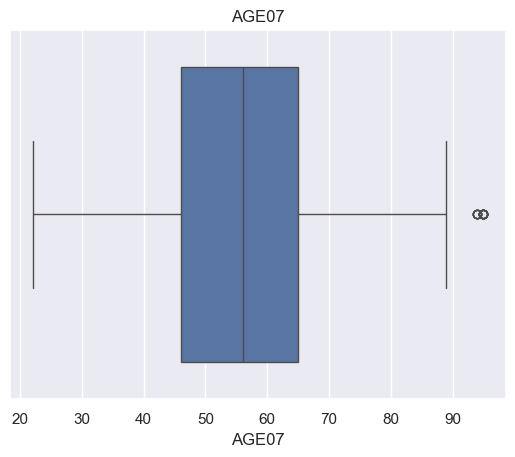

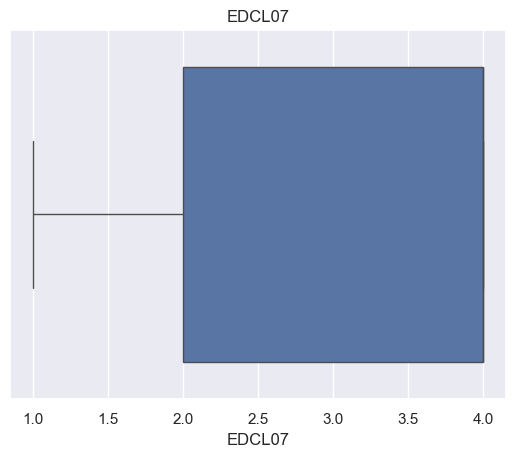

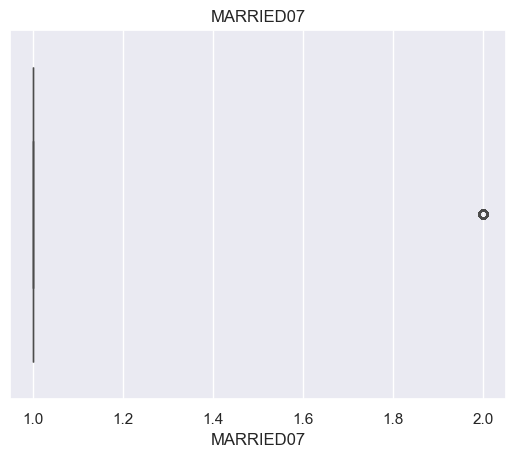

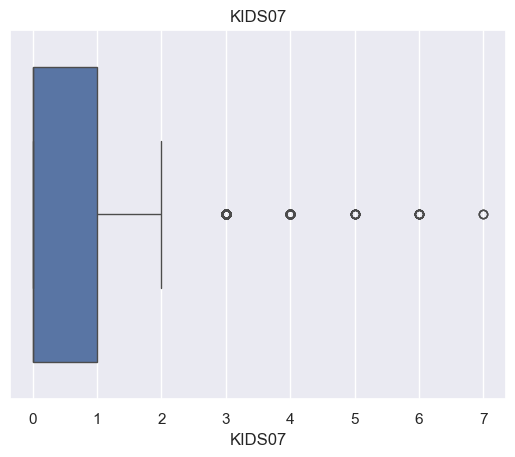

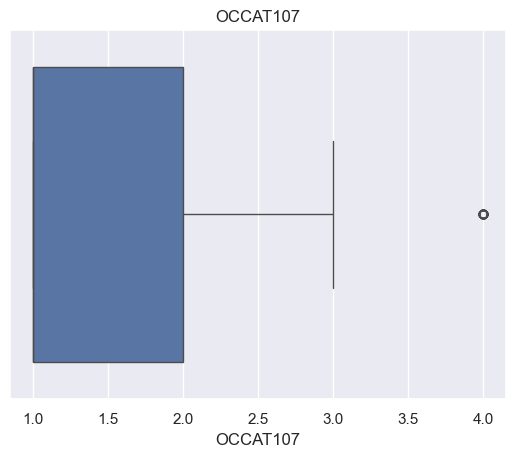

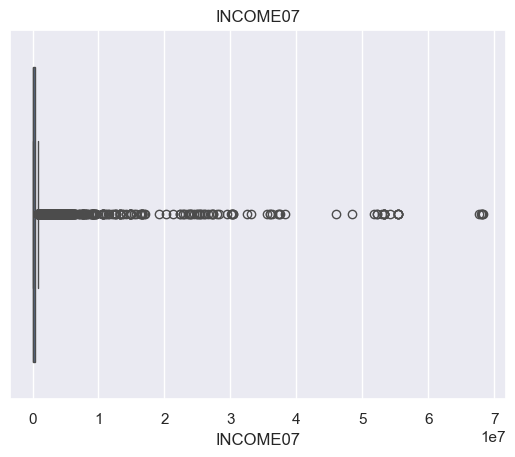

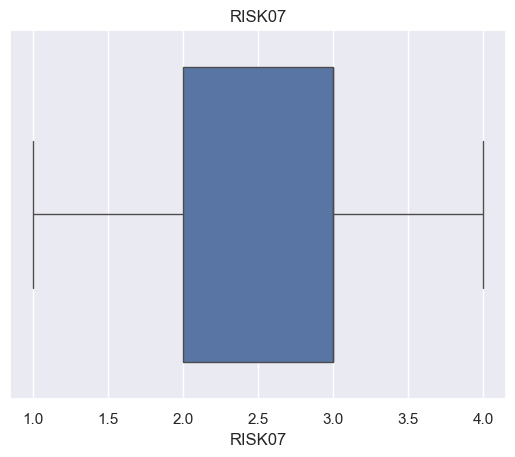

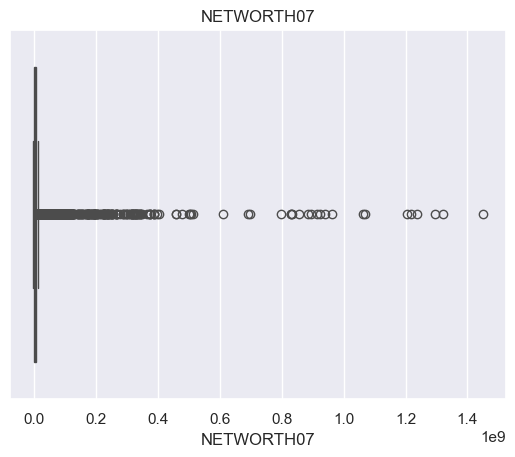

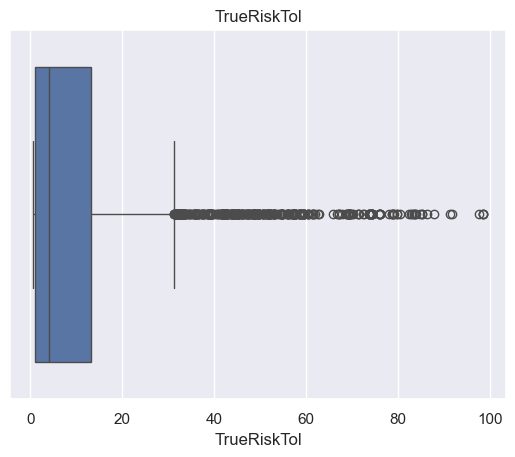

In [554]:
# me fijo outliers en términos de cada variable por medio de boxplots
for i in df.columns:
    sns.boxplot(data=df,x=i)
    plt.title(i)
    plt.show()

In [555]:
#vemos gente con más de 10 millones de dólares en ingresos
print("Gente con ingresos superiores a 10 millones")
print((df['INCOME07'] > 10000000).value_counts())

print()
#vemos gente con más de 200 millones de patrimonio neto
print("Gente con patrimonio neto superior a 20 millones")
print((df['NETWORTH07'] > 200000000).value_counts())

Gente con ingresos superiores a 10 millones
INCOME07
False    4263
True      111
Name: count, dtype: int64

Gente con patrimonio neto superior a 20 millones
NETWORTH07
False    4267
True      107
Name: count, dtype: int64


Hay gente con ingresos superiores a 10 millones dé dólares, y gente con un patrimonio neto de más de 200 millones de dólares. La empresa va a tener diferentes segmentos de clientes, tiene clientes de clase media que quieren ahorrar, pero también van a buscar inversores grandes que les reportan mucha rentabilidad. A mayor nivel de ingreso y patrimonio neto, hay mayor propensión a invertir, por lo tanto no conviene remover los outliers porque esos clientes con altos ingresos y patrimonio estarán siempre presentes (por lo menos la empresa intentará eso). Probablemente estas personas, tengan también mayor propensión al riesgo, por lo que tampoco conviene quitar los outliers en tolerancia al riesgo. De todas maneras seguiremos viendo esto en el E

Podemos probar también un isolation forest

In [558]:
#cargamos librería
from sklearn.ensemble import IsolationForest

In [559]:
# Configurar y entrenar el Isolation Forest
#elijo solo variables predictoras, 
X = df.drop(['TrueRiskTol'],axis=1)

#recordar que no tengo que separar en training y test, ya que isolation forest es ML no supervisado
isolation_forest = IsolationForest(random_state=42)

#hago tanto el fit como el predict sobre todos los datos
outliers = isolation_forest.fit_predict(X)

# Añadir la predicción de outliers al dataset con variables predictoras
df['is_outlier'] = outliers

In [560]:
df

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol,is_outlier
0,47,2,1,0,1,56443.74418,3,352641.71130,6.94744,1
1,47,2,1,0,1,56443.74418,3,340525.21881,6.22316,1
2,47,2,1,0,1,56443.74418,3,348696.08426,6.67671,1
3,47,2,1,0,1,56443.74418,3,351802.87720,6.28685,1
4,47,2,1,0,1,56443.74418,3,358958.85696,6.17702,1
...,...,...,...,...,...,...,...,...,...,...
19278,39,4,1,7,1,152291.61166,3,1617396.40760,10.66479,1
19280,50,4,2,0,2,78808.24659,2,653876.35532,5.97883,1
19281,50,4,2,0,2,78808.24659,2,655843.99086,5.94175,1
19282,50,4,2,0,2,77743.27029,2,654911.95297,5.90346,1


In [566]:
#Le pongo normal si es 1, y outlier si es -1
df['is_outlier'] = df['is_outlier'].map({-1: 'Outlier',1:'Normal'})

In [568]:
df['is_outlier'].value_counts()/len(df)

is_outlier
Normal    0.83356
Outlier   0.16644
Name: count, dtype: float64

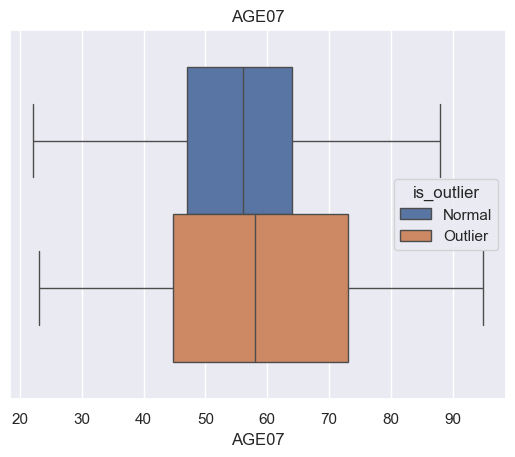

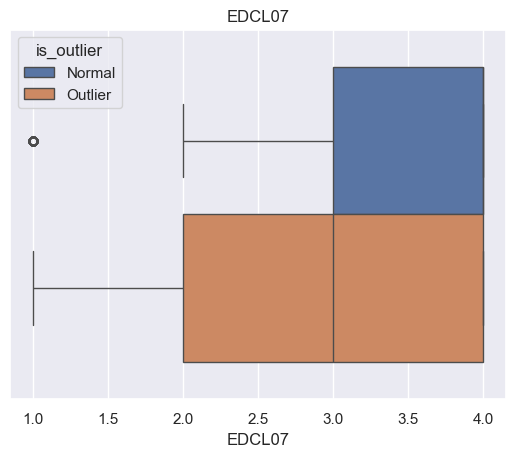

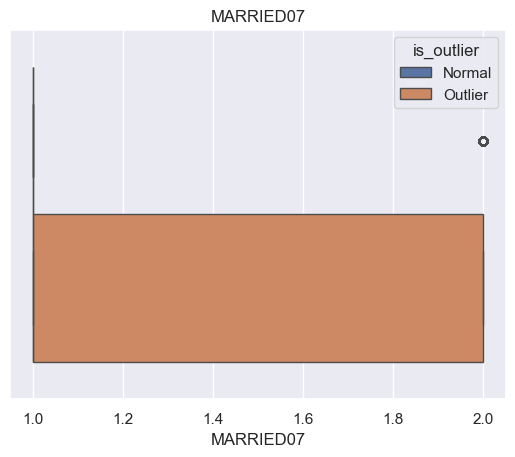

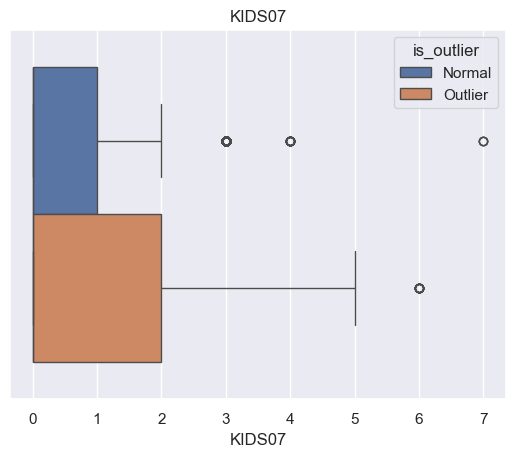

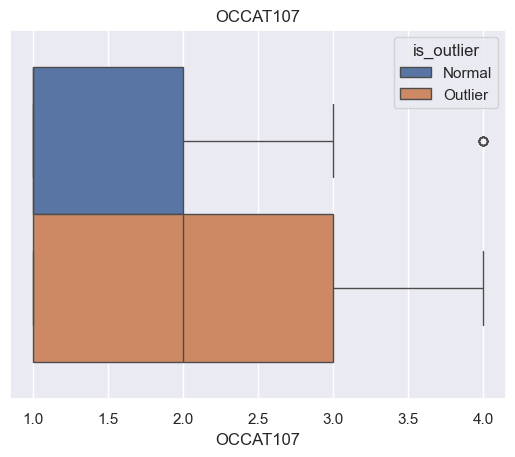

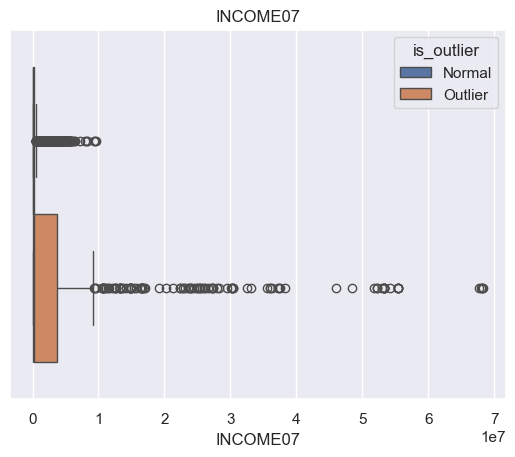

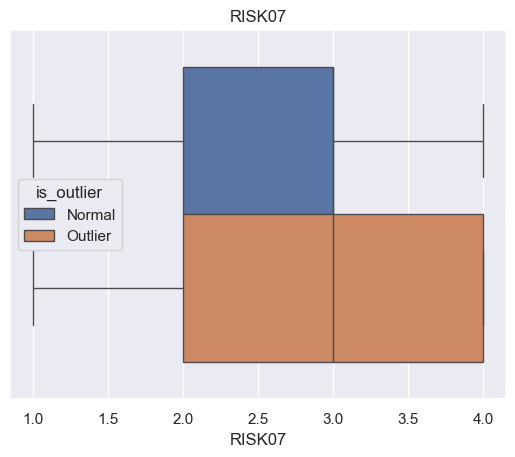

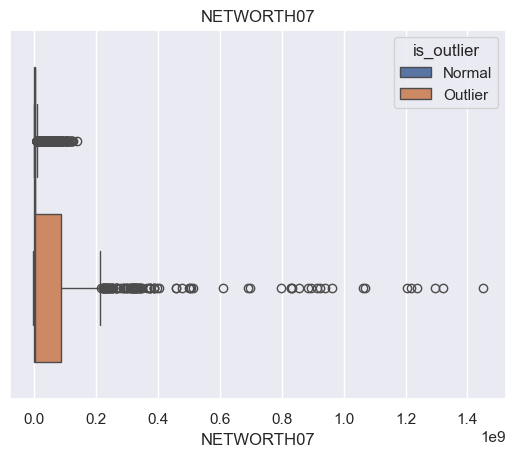

In [570]:
# me fijo outliers en términos de cada variable por medio de boxplots
for i in df.drop(['is_outlier','TrueRiskTol'],axis=1).columns:
    sns.boxplot(data=df,x=i,hue='is_outlier')
    plt.title(i)
    plt.show()

In [572]:
#borro objetos que ya no sirven
del([X,nan_counts,isolation_forest,i,outliers])

La calidad del dataset parece ser buena, no hay missing, los outliers parecen coherentes y no habría que eliminarlos, borramos duplicados en términos de todas las variables, así que podemos seguir con el análisis del dataset.

## 5) Análisis Exploratorio de Datos (EDA)

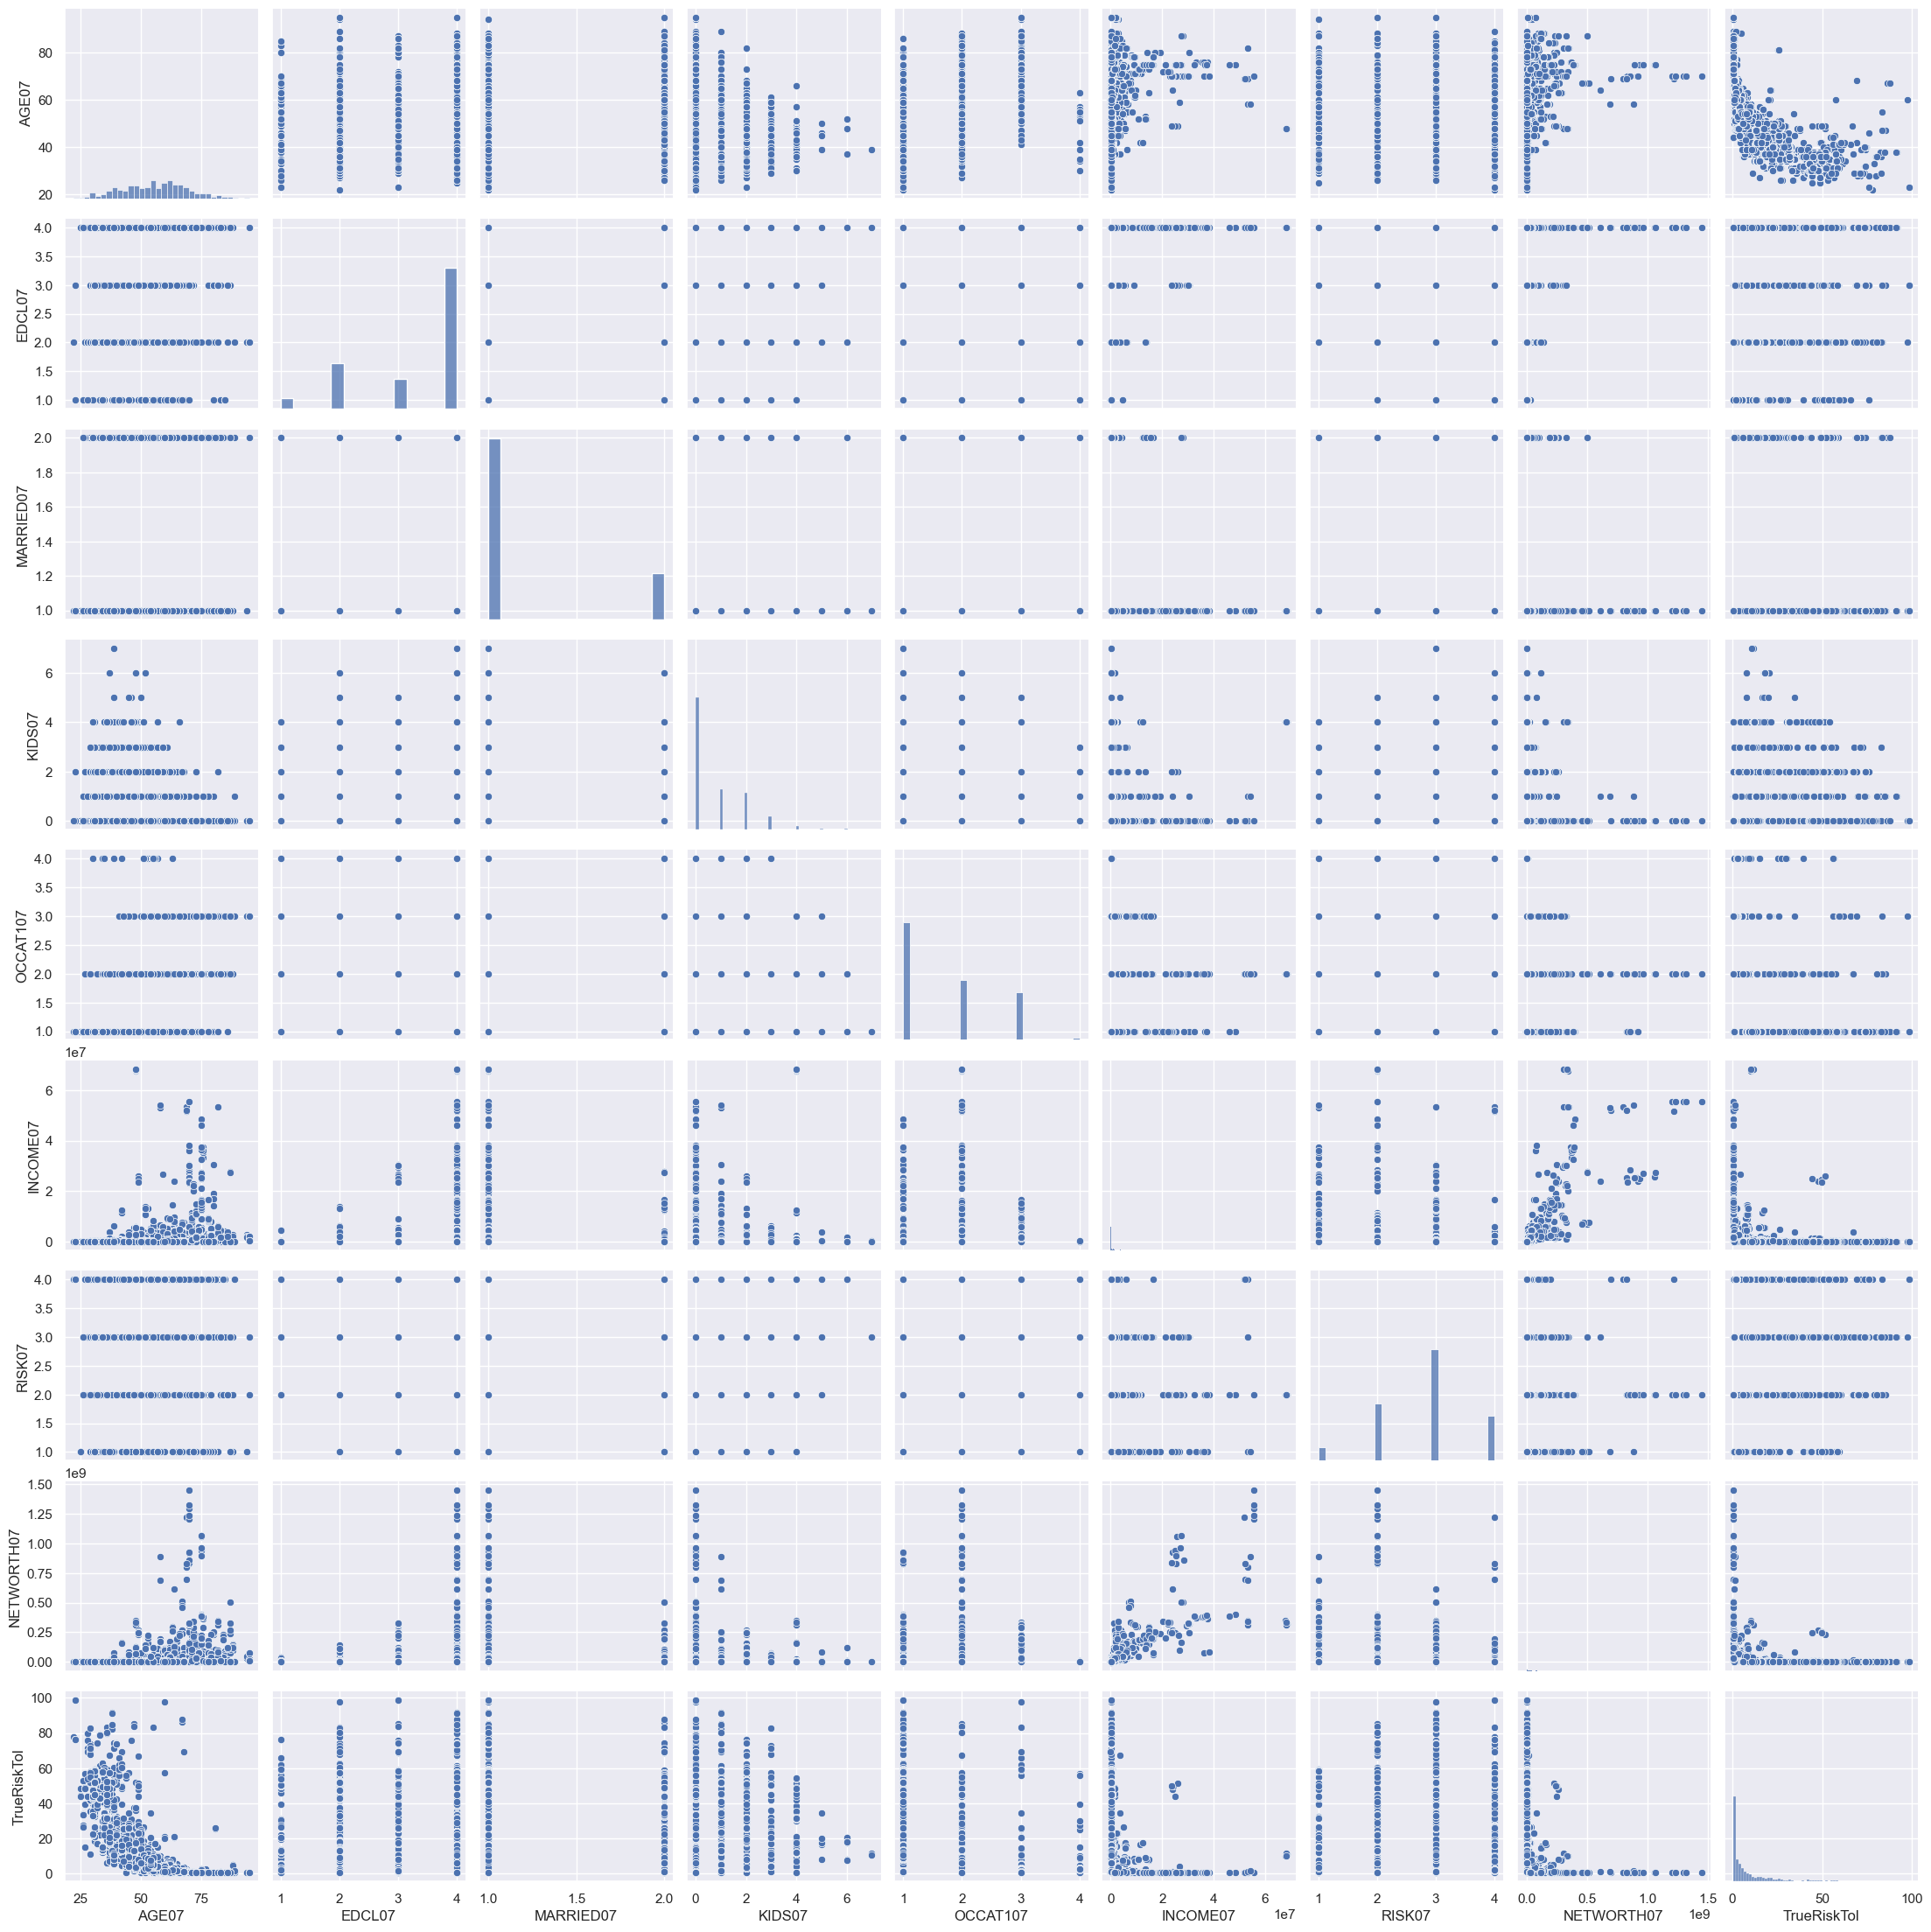

In [515]:
#nos fijamos scatterploy y gráficos de barra e histogramas de todas las variables
sns.pairplot(df)

C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


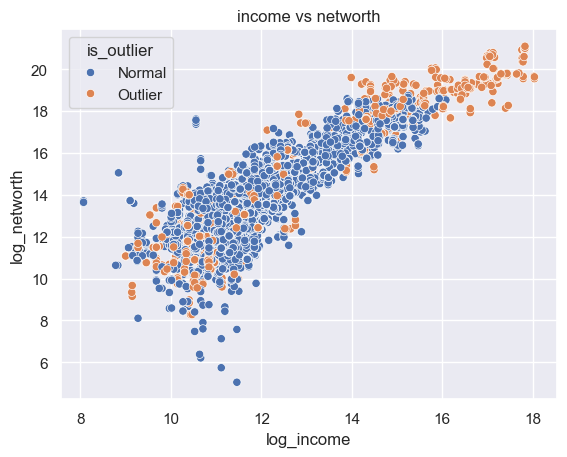

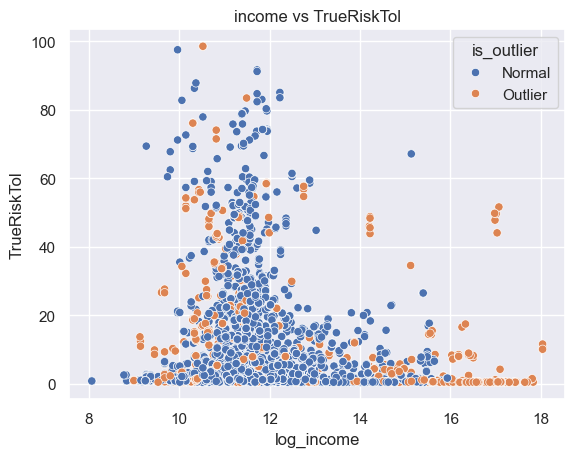

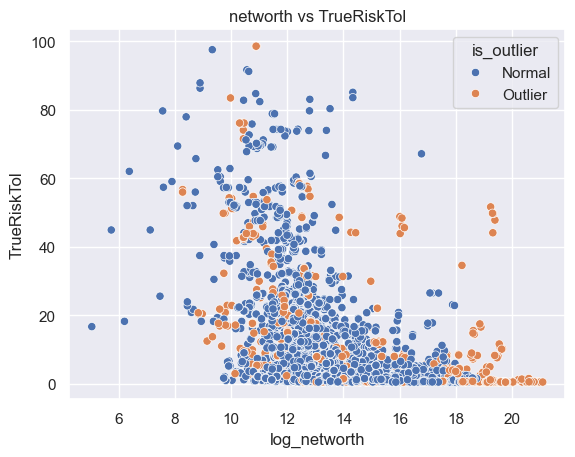

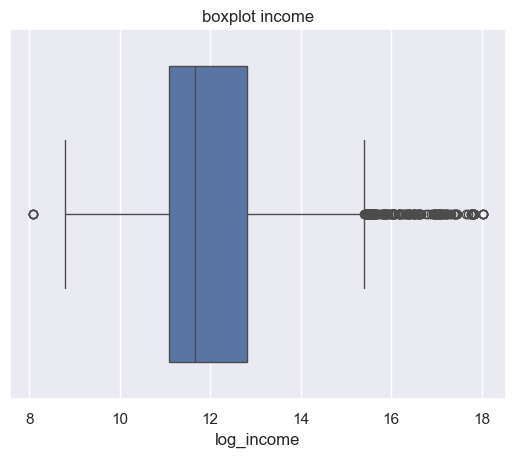

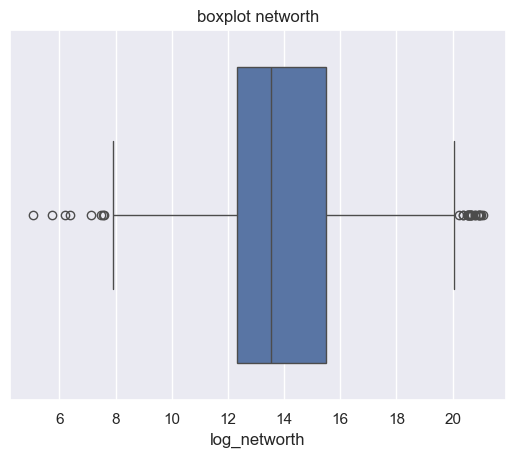

In [574]:
#para analizar mejor el ingreso y el patrimonio neto, podemos hacer una transformación logarítmica
df['log_income']= np.log(df['INCOME07'])
df['log_networth']= np.log(df['NETWORTH07'])

#hago diversos gráficos


sns.scatterplot(data=df,x='log_income',y='log_networth',hue='is_outlier')
plt.title('income vs networth')
plt.show()


sns.scatterplot(data=df,x='log_income',y='TrueRiskTol',hue='is_outlier')
plt.title('income vs TrueRiskTol')
plt.show()


sns.scatterplot(data=df,x='log_networth',y='TrueRiskTol',hue='is_outlier')
plt.title('networth vs TrueRiskTol')
plt.show()

sns.boxplot(data=df,x='log_income')
plt.title('boxplot income')
plt.show()


sns.boxplot(data=df,x='log_networth')
plt.title('boxplot networth')
plt.show()


In [575]:
#borramos las variables outlier y logaritmos
df = df.drop(['is_outlier','log_income','log_networth'],axis=1)

Podemos ver un análisis multivariado de todas las variables mediante un heatmap

<Axes: >

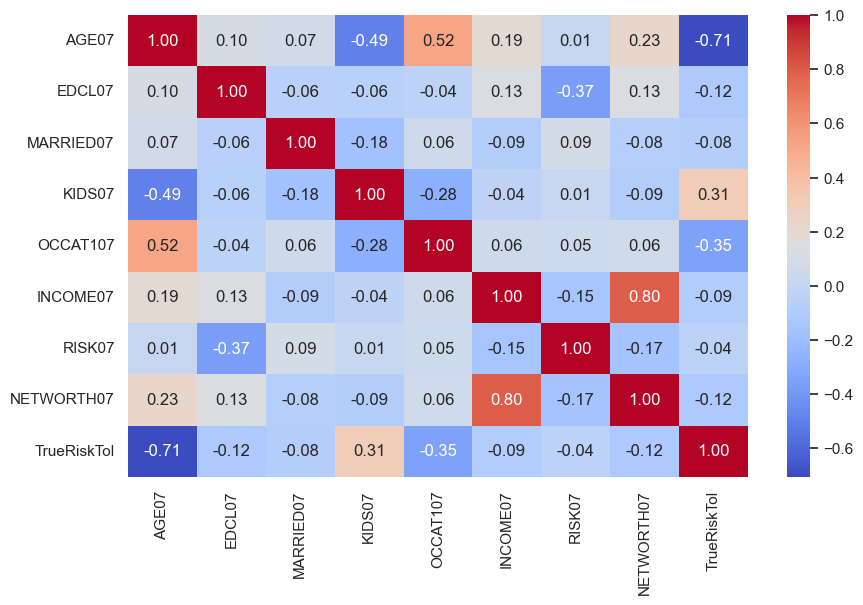

In [579]:
plt.figure(figsize=(10, 6)) 
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f",annot=True)

## 6) Técnicas de machine learning a usar

Tenemos que predecir la variable TrueRiskTol, por lo tanto tenemos una variable target, y estamos ante un problema de Machine Learning Supervisado. Al ser TrueRiskTol una variable numérica, entonces es un problema de regresión.

Probaremos los siguientes métodos: regresión lineal,  SVM, KNN, decision tree, random forest, gradient boosting y XGBoost.

Al ser un problema de regresión, trataremos de minimizar el error. Como estamos prediciendo la tolerancia al riesgo, y en función de ello vamos a decidir que inversiones realizar lo cual puede llevar a que si hay un error alto invertir en algo más riesgoso que lo que la persona está dispuesto a aceptar (con lo cual podría llegar a perder mucho dinero), nos conviene usar el RMSE, ya que castiga más a las predicciones que se alejan del valor real. Por lo tanto, vamos a elegir aquellos hiperparámetros y modelos que tengan menor RMSE.

## 7) Feature engineering

Tenemos 3 variables que en realidad son categorías:MARRIED07, EDCL07 y  OCCAT107. Vamos a pasarlas a categoría.

EDCL07: El nivel de educación alcanzado, establecido mediante 4 categorías:<br>
1 no terminó secundaria <br>
2 Secundaria terminada<br>
3 Universidad incompleta<br>
4 Universidad completa<br>

MARRIED07: estado conyugal:<br>
1 si está casado<br>
2 si no está casado<br>


OCCAT107: La categoría de ocupación de la persona:<br>
1 gerencial/professional <br>
2 tecnico/ventas/servicios<br>
3 otras (producción, operadores, artesanos, obreros)<br>
4 no están trabajando (desempleados o jubilados)<br>

MARRIED07

In [585]:
#hacemos el conteo para asegurarnos que hacemos bien la transformación
df['MARRIED07'].value_counts()

MARRIED07
1    3481
2     893
Name: count, dtype: int64

In [587]:
df['MARRIED07'] = df['MARRIED07'].map({1: 'casado',2:'no casado'})

In [589]:
df['MARRIED07'].value_counts()

MARRIED07
casado       3481
no casado     893
Name: count, dtype: int64

EDCL07

In [598]:
df['EDCL07'].value_counts()

EDCL07
4    2707
2     885
3     572
1     210
Name: count, dtype: int64

In [604]:
df['EDCL07'] = df['EDCL07'].map(
                                {
                                    1: 'no terminó secundaria',
                                    2:'Secundaria terminada',
                                    3:'Universidad incompleta',
                                    4: 'Universidad completa'
                                }
)

In [606]:
df['EDCL07'].value_counts()

EDCL07
Universidad completa      2707
Secundaria terminada       885
Universidad incompleta     572
no terminó secundaria      210
Name: count, dtype: int64

OCCAT107

In [611]:
df['OCCAT107'].value_counts()

OCCAT107
1    2271
2    1150
3     914
4      39
Name: count, dtype: int64

In [615]:
df['OCCAT107'] = df['OCCAT107'].map(
                                {
                                    1: 'gerencial/profesional',
                                    2:'tecnico/ventas/servicios',
                                    3:'otras (producción, operadores, artesanos, obreros)',
                                    4: 'no están trabajando (desempleados o jubilados)'
                                }
)

In [617]:
df['OCCAT107'].value_counts()

OCCAT107
gerencial/profesional                                 2271
tecnico/ventas/servicios                              1150
otras (producción, operadores, artesanos, obreros)     914
no están trabajando (desempleados o jubilados)          39
Name: count, dtype: int64

Empezamos a dividir en train/test, ya que algunas de las transformaciones las haremos sobre esos datasets y no sobr el dataset original

In [624]:
df

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,TrueRiskTol
0,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,352641.71130,6.94744
1,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,340525.21881,6.22316
2,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,348696.08426,6.67671
3,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,351802.87720,6.28685
4,47,Secundaria terminada,casado,0,gerencial/profesional,56443.74418,3,358958.85696,6.17702
...,...,...,...,...,...,...,...,...,...
19278,39,Universidad completa,casado,7,gerencial/profesional,152291.61166,3,1617396.40760,10.66479
19280,50,Universidad completa,no casado,0,tecnico/ventas/servicios,78808.24659,2,653876.35532,5.97883
19281,50,Universidad completa,no casado,0,tecnico/ventas/servicios,78808.24659,2,655843.99086,5.94175
19282,50,Universidad completa,no casado,0,tecnico/ventas/servicios,77743.27029,2,654911.95297,5.90346


In [ ]:
# Importando bibliotecas
from sklearn.model_selection import train_test_split #lograr dividir las muestras
from sklearn.preprocessing import MinMaxScaler


In [628]:
#primero divido en predictores y target
X = df.drop("TrueRiskTol",axis=1)
y = df["TrueRiskTol"]

Creo variables dummy

In [633]:
#voy a hacerlo solo sobre las variables categóricas, las miro
df.select_dtypes(include='O')

,EDCL07,MARRIED07,OCCAT107
0,Secundaria terminada,casado,gerencial/profesional
1,Secundaria terminada,casado,gerencial/profesional
2,Secundaria terminada,casado,gerencial/profesional
3,Secundaria terminada,casado,gerencial/profesional
4,Secundaria terminada,casado,gerencial/profesional
...,...,...,...
19278,Universidad completa,casado,gerencial/profesional
19280,Universidad completa,no casado,tecnico/ventas/servicios
19281,Universidad completa,no casado,tecnico/ventas/servicios
19282,Universidad completa,no casado,tecnico/ventas/servicios


In [ ]:
#Creo variables dummy de las 3 variables categóricas
pd.get_dummies(df.select_dtypes(include='O'))

In [ ]:
#Hago split 

## BONUS

Por otra parte, usted ha descargado datos de SP 500 de diversos activos, a efectos de poder formar un portafolio con los activos financieros con los que más comercia la empresa.


Posteriormente, si elaboramos un modelo que sea satisfactorio, use puede hacer un deploy del mismo, incorporándolo a un dashboard donde, ingresando las características del inversor, se pueda predecir el perfil de riesgo del mismo (el índice). Con este índice de tolerancia al riesgo, se puede automatizar la selección del portafolio óptimo para ese riesgo usando el modelo de Markowitz, lo cual creando así un robo-advisor.